In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

In [31]:
df = pd.read_csv(r'D:\Documents\FeynnLab\production_export.csv',index_col='year')


In [32]:
df.head()

,production,export
year,,
2001,203.12,97.2000
2005,227.01,100.1000
2010,243.37,90.8000
2015,241.36,97.2000
2020,220.12,90.2636


In [33]:
df.shape, df.columns

((5, 2), Index(['production', 'export'], dtype='object'))

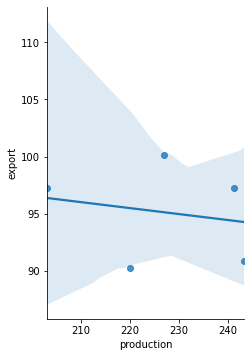

In [51]:
sns.pairplot(df, x_vars='production', 
             y_vars='export', height=5, aspect=0.7, kind='reg')

In [52]:
#Form of linear regression

x = df['production']
y = df['export']

In [53]:
#Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3,)
(2,)
(3,)
(2,)


In [55]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [56]:
#Interpreting model coefficients

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)



91.92960947547513
[0.01335355]


In [60]:
y_pred = linreg.intercept_ + linreg.coef_ * X_test
print('predicted response:', y_pred, sep='\n')

predicted response:
year
2010    95.179464
2005    94.961000
Name: production, dtype: float64


In [79]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_new

,Actual,Predicted
year,,
2010,90.8,95.179464
2005,100.1,94.961000


In [63]:
X_test

year
2010    243.37
2005    227.01
Name: production, dtype: float64

In [67]:
linreg.predict(X_test.values.reshape(-1,1))

array([95.17946376, 94.96099963])